## 1. Prepare logbook 

In [1]:
from ipywidgets import widgets
from IPython.display import display

from pprint import pprint
from ipywidgets.widgets import interact

In [2]:
import os, os.path
import datetime

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec

import matplotlib as mpl

In [4]:
font = {'family' : 'monospace',
       'size' : '14'}
mpl.rc('font', **font)

In [5]:
from PIL import Image
import numpy as np
import pandas as pd

## 2. Select Counts vs Time files

In [6]:
default_dir = '/Volumes/My Book Thunderbolt Duo/IPTS/IPTS-16259/Day_4_CO-4_Uptake/time_stamps/'

In [7]:
from PyQt4 import QtGui
%gui qt

In [8]:
try:
    from PySide import QtCore, QtGui
except ImportError:
    from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select a directory
    """
    if dir is None: dir ='./'
    dir_name = QtGui.QFileDialog.getOpenFileNames(None, "Select txt files ...",
                                                  dir,
                                                 filter = "ASCII (*.txt);;All (*.*)")
                                                 
    return dir_name

In [11]:
%gui qt
list_files = gui_fname(dir = default_dir)
#pprint(list_files)

## 3. Load the data 

In [23]:
w = widgets.IntProgress()
w.max = len(list_files)
display(w)
index = 0

file_data = {}
for ref, file in enumerate(list_files):

    
    
    
    index += 1
    w.value = index

In [30]:
file_0 = pd.read_csv(list_files[0])
file_0

,,,,,,#File display: /Volumes/My Book Thunderbolt Duo/IPTS/IPTS-16259/Day_4_CO-4_Uptake/20160922_CO-4_Uptake_0000_0052.tiff
#ROI selected (y0,x0,height,width):(0,1234.0,2159.0,34)
#Rebin in y direction: 3,NaN,NaN,NaN,NaN,NaN,NaN
#Time stamp: 2016-09-22 18:18:26,NaN,NaN,NaN,NaN,NaN,NaN
#Delta time (s): 0.03323698043823242,NaN,NaN,NaN,NaN,NaN,NaN
#,NaN,NaN,NaN,NaN,NaN,NaN
#pixel_index,counts,NaN,NaN,NaN,NaN,NaN
0,101.03066935021738,NaN,NaN,NaN,NaN,NaN
1,99.54520493333254,NaN,NaN,NaN,NaN,NaN
2,101.16155053761926,NaN,NaN,NaN,NaN,NaN
3,103.19635469195099,NaN,NaN,NaN,NaN,NaN


## 4. Select Range of Image to Work On 

Using the Image Index (*image_index*) slider, narrow down the range of images that we will use in the analysis. Make sure you play wit the **min_intensity** and **max_intensity** to change the contrast of the images. 

### a. Default Contrast  and Profile Range

In [24]:
min_intensity = 0
max_intensity = 500

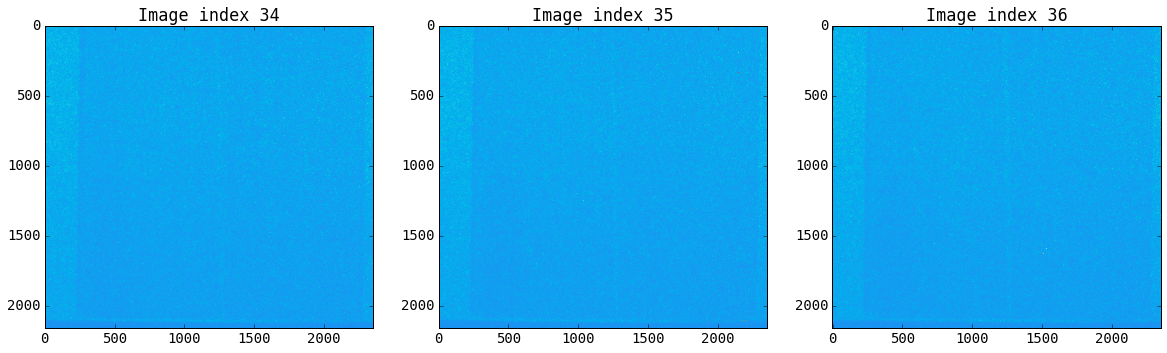

In [25]:
def plot_images(file_index):
    
    data_left = array_images[file_index-1]
    data      = array_images[file_index]
    data_right = array_images[file_index+1]
    
    fig = plt.figure(figsize=(20,20))
    gs = gridspec.GridSpec(1,3)
    
    ax_img = plt.subplot(gs[0,0])
    ax_img.imshow(data_left, cmap='rainbow', 
                  interpolation=None,
                  vmin=min_intensity, 
                  vmax=max_intensity)
    ax_img.set_title("Image index %d" %(file_index-1))

    ax_img = plt.subplot(gs[0,1])
    ax_img.imshow(data, cmap='rainbow', 
                  interpolation=None,
                  vmin=min_intensity, 
                  vmax=max_intensity)
#    ax_img.add_patch(patches.Rectangle((x_left, y_top), width, height, fill=False))
    ax_img.set_title("Image index %d" %file_index)
    

    ax_img = plt.subplot(gs[0,2])
    ax_img.imshow(data_right, cmap='rainbow', 
                  interpolation=None,
                  vmin=min_intensity, 
                  vmax=max_intensity)
    ax_img.set_title("Image index %d" %(file_index+1))
    

    
number_of_files = len(list_files)
range_selection = interact(plot_images,
                          file_index = widgets.IntSlider(min=1, 
                                                         max=number_of_files-2, 
                                                         value=35, 
                                                         step=1, 
                                                         description="Image Index"))


### b. Image range

Using previous plot, you determined that the range of images of interest is between:


In [26]:
first_image_index = 35
last_image_index = 80

In [27]:
[image_height, image_width] = array_images[0].shape
working_array_images = array_images[first_image_index : last_image_index+1]
working_list_files = list_files[first_image_index : last_image_index+1]

## 5. Normalize data

The data will be all normalized by using the first image. Each image will be divided by the first image.

In [28]:
normalization_image = list_files[0]
normalization_data = array_images[0]

_list_files = working_list_files

w = widgets.IntProgress()
w.max = len(_list_files)
display(w)
index = 0

normalized_array_images = []
for _image in working_array_images:
    _normalized_image = _image / normalization_data
    normalized_array_images.append(_normalized_image)
    index += 1
    w.value = index

Clear memory

In [29]:
del(array_images[:])
del(array_images)

## 6. Select Profile Region 

default_profile_range

In [30]:
min_intensity = 0
max_intensity = 1

In [31]:
x_left = 1234
y_top = 0
width = 34
height = 2159

[1234, 0, 34, 2159, <matplotlib.figure.Figure at 0x116275198>]

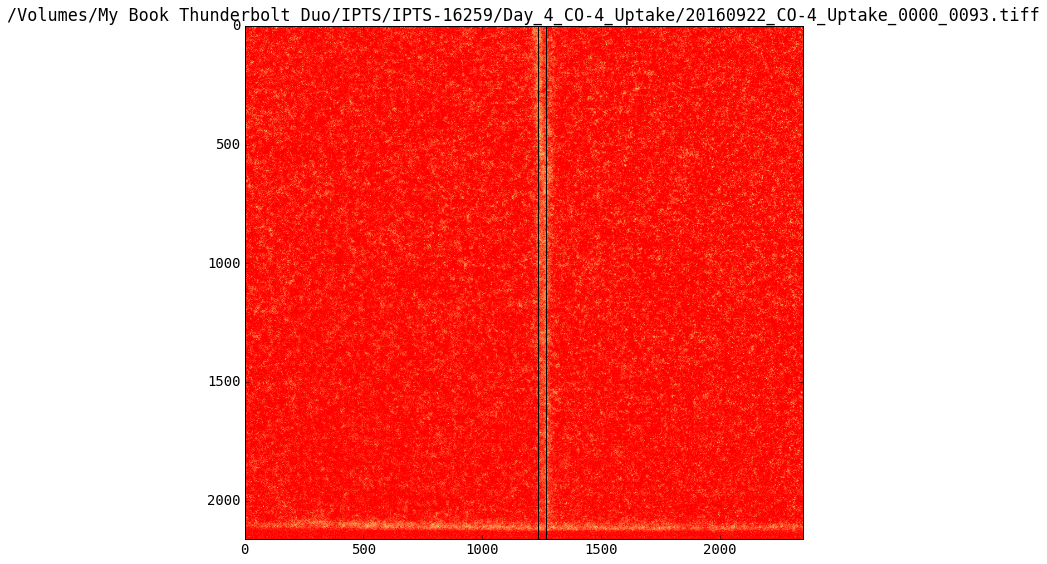

In [32]:
def plot_images_with_box(file_index, x_left, y_top, width, height):
    
    data = normalized_array_images[file_index][:, :]
    
    fig_box = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)
    
    ax_img.imshow(data, cmap = 'rainbow',
                  interpolation = None,
                  vmin = min_intensity,
                  vmax = max_intensity)
    ax_img.set_title(working_list_files[file_index])
    ax_img.add_patch(patches.Rectangle((x_left, y_top), width, height, fill=False))
    
    return [x_left, y_top, width, height, fig_box]

number_of_files = len(list_files)
profile = interact(plot_images_with_box,
                  file_index = widgets.IntSlider( min=0, max=len(working_list_files), 
                                                 value=42, step=1, 
                                                 description='Image index'),
                  x_left = widgets.IntSlider( min=0, max=image_width-1, step=1, value= x_left),
                  y_top = widgets.IntSlider( min=0, max=image_height-1, step=1, value= y_top), 
                  width = widgets.IntSlider( min=0, max=image_width-1, step=1, value= width), 
                  height = widgets.IntSlider( min=0, max=image_height-1, step=1, value=height))
    

## 7. calculate profile over range of images 

In [33]:
print(profile.widget.kwargs)
y_top = profile.widget.kwargs['y_top']
x_left = profile.widget.kwargs['x_left']
width = profile.widget.kwargs['width']
height = profile.widget.kwargs['height']

{'y_top': 0, 'x_left': 1234, 'width': 34, 'height': 2159, 'file_index': 42}


In [34]:
w = widgets.IntProgress()
w.max = len(working_list_files)-1
display(w)
index = 0

profile_array = []
for _image in normalized_array_images:
    _profile_image = _image[y_top:y_top+height, x_left:x_left+width]
    _value = np.sum(_profile_image)
    profile_array.append(_value)
    w.value = index
    index += 1

## 8. Display global profile 

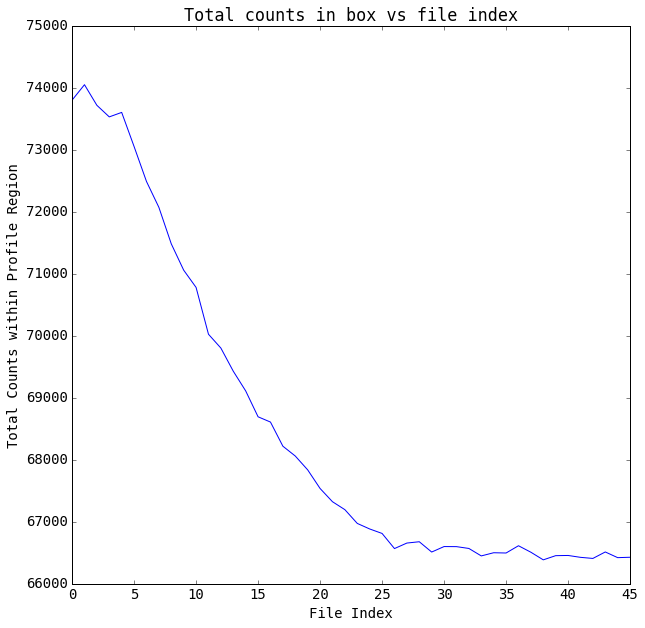

In [35]:
fig_profile = plt.figure(figsize=(10, 10))
plt.plot(profile_array)  
plt.title("Total counts in box vs file index")
plt.xlabel("File Index")
plt.ylabel("Total Counts within Profile Region")

## 9. Display Profile vs File Index  

In order to improve the statitics, **rebin** allows to combine those pixels in the y-direction. 

In [36]:
rebin = 3  #number of pixels in y direction to rebin (to improve statistic)

Calculate the profile
 - rebin the pixels as defined by the **rebin** parameter along the y-axis
 - sum all the pixels along the x-axis

In [37]:
w = widgets.IntProgress()
w.max = len(working_list_files)-1
display(w)
index = 0
rebin_range = np.arange(0, height-y_top, rebin)

profile_1d = []
def calculate_1d_profiles():
    
    for _index, _array in enumerate(normalized_array_images):
        _roi_array = _array[y_top:y_top+height, x_left:x_left+width]
        _width_profile = np.sum(_roi_array,1)
        rebin_width_profile = [sum(_width_profile[x:x+rebin]) for x in rebin_range]
        profile_1d.append(rebin_width_profile)
        _index += 1
        w.value = _index
    
calculate_1d_profiles()

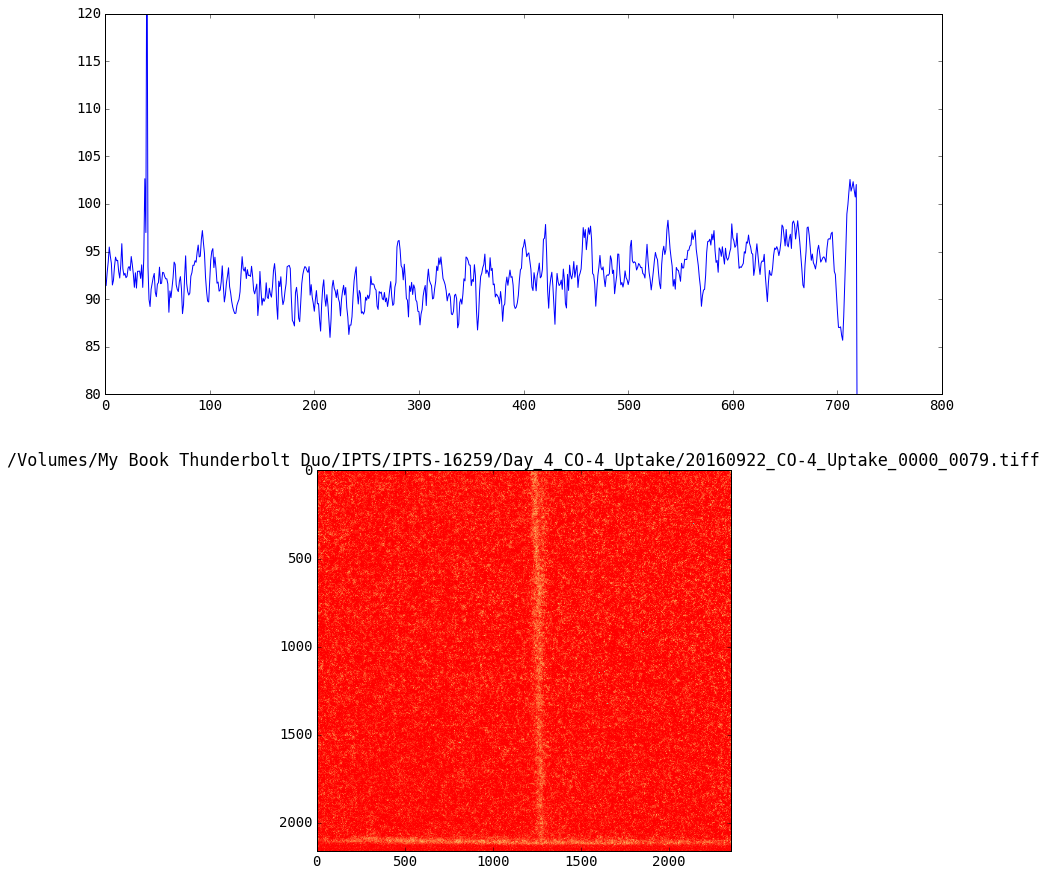

In [38]:
counts_max = 120
counts_min = 80

def plot_profile(file_index):
    
    data_1d = profile_1d[file_index]
    data_2d = normalized_array_images[file_index]
    
    fig = plt.figure(figsize=(15,15))
    
    plt.subplot(211)
    plt.plot(data_1d)
    plt.ylim([counts_min, counts_max])
    
    ax_img = plt.subplot(212)
    ax_img.imshow(data_2d, cmap = 'rainbow',
                  interpolation = None,
                  vmin = min_intensity,
                  vmax = max_intensity)
    ax_img.set_title(working_list_files[file_index])

number_of_files = len(working_list_files)
range_selection = interact(plot_profile,
                          file_index = widgets.IntSlider(min=0, 
                                                         max=number_of_files-1, 
                                                         value=0, 
                                                         step=1, 
                                                         description="Image Index"))

## 10. Load file vs time stamp 

In [82]:
def gui_fname(dir=None):
    """Select a directory
    """
    if dir is None: dir ='./'
    dir_name = QtGui.QFileDialog.getOpenFileName(None, 
                                                 "Select txt data file ...",
                                                  dir,
                                                  filter = "ascii (*.txt)",
)
                                                 
    return dir_name

In [83]:
%gui qt
file_vs_timestamp_file = gui_fname(dir = default_dir)
#pprint(file_vs_file)

In [120]:
df = pd.read_csv(file_vs_timestamp_file)

In [121]:
df.head()

,#FileName,timeStamp_s,timeOffset_ms
0,20160922_CO-4_Uptake_0000_0015.tiff,1.474583e+09,0.000000
1,20160922_CO-4_Uptake_0000_0016.tiff,1.474583e+09,33.401489
2,20160922_CO-4_Uptake_0000_0017.tiff,1.474583e+09,66.128969
3,20160922_CO-4_Uptake_0000_0018.tiff,1.474583e+09,99.081278
4,20160922_CO-4_Uptake_0000_0019.tiff,1.474583e+09,132.167816


In [122]:
# trying to locate a value knowing the name of file
FileNameColumn = df['#FileName']
#print(FileNameColumn)
result = df.loc[df['#FileName'] == '20160922_CO-4_Uptake_0000_0015.tiff']
time_stamp = print(result.values[0][1])

1474582705.2265878


In [135]:
list_file_name = df['#FileName'].values
list_column = df.columns.values
list_time_stamp = df[list_column[1]].values

## 11. Output profiles of previous image index selected

In [140]:
image_index = range_selection.widget.kwargs['file_index']
current_file = working_list_files[image_index]
current_profile = profile_1d[image_index]

In [141]:
def gui_fname(dir=None):
    """Select a filename
    """
    if dir is None: dir ='./'
    dir_name = QtGui.QFileDialog.getSaveFileName(None, "Define output file name",
                                                  dir)
                                                 
    return dir_name

In [142]:
%gui qt
ascii_file = gui_fname(dir = default_dir)
#pprint(ascii_file)

In [145]:
time_0 = list_time_stamp[first_image_index]

def create_ascii_contain(image_index):
    ascii_contain = []
    ascii_contain.append("#File display: {}\n".format(working_list_files[image_index]))
    ascii_contain.append("#ROI selected (y0,x0,height,width):({},{},{},{})\n".format(y_top, x_left, height, width))
    ascii_contain.append("#Rebin in y direction: {}\n".format(rebin))
    _time_stamp = list_time_stamp[image_index + first_image_index]
    _time_stamp_str = datetime.datetime.fromtimestamp(_time_stamp).strftime("%Y-%m-%d %H:%M:%S")
    ascii_contain.append("#Time stamp: {}\n".format(_time_stamp_str))
    _delta_time = _time_stamp - time_0
    ascii_contain.append("#Delta time (s): {}\n".format(_delta_time))
    ascii_contain.append("#\n")
    ascii_contain.append("#pixel_index, counts\n")
    for index, value in enumerate(profile_1d[image_index]):
        ascii_contain.append("{}, {}\n".format(index, value))
    return ascii_contain

ascii_contain = create_ascii_contain(image_index)
if ascii_file:
    f = open(ascii_file, 'w')
    for _line in ascii_contain:
        f.write(_line)
    f.close()        


## 12. Output profiles of all images

In [146]:
def gui_dname(dir=None):
    """Select folder
    """
    if dir is None: dir ='./'
    dir_name = QtGui.QFileDialog.getExistingDirectory(None, "Select Folder where to Output all the Profiles ...",
                                                  dir,
                                                  QtGui.QFileDialog.ShowDirsOnly)
    return dir_name

In [147]:
%gui qt
dir_name = gui_dname(dir = default_dir)
%matplotlib inline

In [148]:
def output_ascii_file(filename = None, data = None):
    f = open(filename, 'w')
    for _line in data:
        f.write(_line)
    f.close()

In [149]:
raw_file_name = 'profile1d_'
for _index, _profile in enumerate(profile_1d):
    output_file_name = os.path.join(dir_name, 'raw_file_name_' + str(_index) + '.txt')
    ascii_contain = create_ascii_contain(_index)
    output_ascii_file(filename = output_file_name, data = ascii_contain)